This week's Tidy Tuesday is text data from Amazon's Annual Reports, courtesy of Gregory Vander Vinne who did a lot of data cleaning/munging! He did a really cool dive on this data as well as the tidytext package [here](https://github.com/rfordatascience/tidytuesday/blob/main/data/2025/2025-03-25/readme.md).

The notebook below consists of some intial EDA that I did before deciding on what kind of figure I wanted to create!

# Step 0 - Install Packages
For this figure, I'm probably end up using ggplot2 as well as dplyr and tidyverse for initial data manipulation and review.

In [72]:
library(dplyr)
library(tidyverse)
library(ggplot2)

# Step 1 - Get the dataset
Now lets, upload the dataset for this week. There are multiple ways to do this but I'm going to take the simple route and download the "cleaned" dataset with stop words-- words like "a", "and", etc-- removed directly from the [TidyTuesday GitHub](https://github.com/rfordatascience/tidytuesday). If you want more details behind that process, the provider of this dataset has gone through their process on their website [here](https://gregoryvdvinne.github.io/Text-Mining-Amazon-Budgets.html#Using_Simple_Text_Mining_Techniques). 

In [73]:
report_words_clean <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2025/2025-03-25/report_words_clean.csv')
glimpse(report_words_clean)


Rows: 411626 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): word
dbl (1): year

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 411,626
Columns: 2
$ year <dbl> 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005, 2005,…
$ word <chr> "shareholders", "decisions", "amazon.com", "data", "answer", "wro…


In [3]:
range(report_words_clean$year) #range is from 2005 to 2023

[1] 2005 2023

The dataset has 411,626 rows that consists of two columns, `year` and `word`. `year` covers the annual reports from 2005 to 2023, and `word` covers each instance of a non-stop word in the report. Thus, if the word "financial" shows up 100 times in the annual report for 2019? There will be 100 rows consisting of \[2019, "financial"\].

# Step 2 - (very very light) EDA
So before I start creating a figure, lets dig around the data to see if there are anything interesting in this dataset! Is the length of the reports constient from year to year?

In [74]:
report_words_clean %>%
  group_by(year) %>%
  summarize("report_length" = n())

year,report_length
<dbl>,<int>
2005,22977
2006,20560
2007,20554
2008,20338
2009,18454
2010,18205
2011,19839
2012,20394
2013,21975


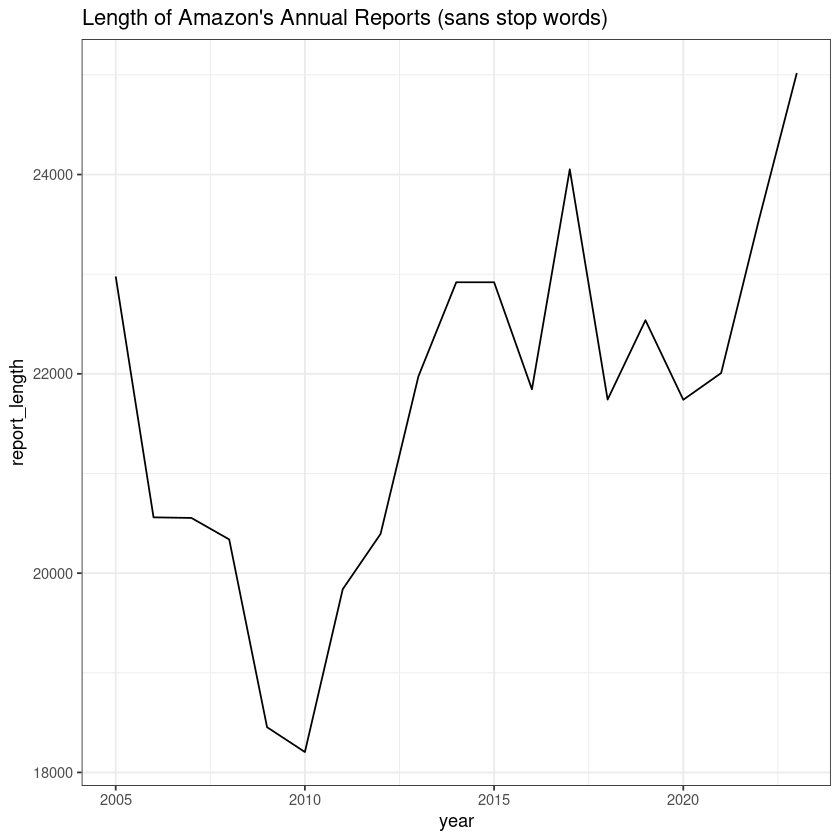

In [5]:

report_words_clean %>%
  group_by(year) %>%
  summarize("report_length" = n()) %>%
  ggplot(aes(x=year,y=report_length)) +
	geom_line() +
	ggtitle("Length of Amazon's Annual Reports (sans stop words)") +
	theme_bw()

Huh, the number of non stop-words straight up tanked (dropped below 20K words) between 2009 and 2011? Did anything special happen then? Or anything different in those periods? Maybe the most common words seen during those years can tell us something? What are the top 10 words seen between 2005 to 2023 combined? 

In [78]:
#lets get the top ten more common words overall

overall_top_10_terms <- report_words_clean %>%
	group_by(word) %>%
	summarize("word_count" = n()) %>%
	slice_max(order_by = word_count,n = 10) %>%
	select(word)

overall_top_30_terms <- report_words_clean %>%
	group_by(word) %>%
	summarize("word_count" = n()) %>%
	slice_max(order_by = word_count,n = 30) %>%
	select(word)

overall_top_10_terms

word
<chr>
cash
million
net
tax
december
sales
income
financial
stock


What about in the years where the non-stop word length was under 20K?

In [81]:
#lets get the top ten more common words from 2009, 2010, 2011
sub_20K_years = c(2009, 2010,2011)

under_20K_report_top_10_words <- report_words_clean %>%
	filter(year %in% sub_20K_years) %>%
	group_by(word) %>%
	summarize("word_count" = n()) %>%
	slice_max(order_by = word_count,n = 10) %>%
	select(word)

under_20K_report_top_30_words <- report_words_clean %>%
	filter(year %in% sub_20K_years) %>%
	group_by(word) %>%
	summarize("word_count" = n()) %>%
	slice_max(order_by = word_count,n = 30) %>%
	select(word)

under_20K_report_top_10_words

word
<chr>
million
net
cash
stock
sales
financial
tax
december
income


How about years not in that range?

In [82]:
#lets get the top ten more common words outside of that time range

over_20K_report_top_10_words <- report_words_clean %>%
	filter(!(year %in% sub_20K_years)) %>%
	group_by(word) %>%
	summarize("word_count" = n()) %>%
	slice_max(order_by = word_count,n = 10) %>%
	select(word)

over_20K_report_top_30_words <- report_words_clean %>%
	filter(!(year %in% sub_20K_years)) %>%
	group_by(word) %>%
	summarize("word_count" = n()) %>%
	slice_max(order_by = word_count,n = 30) %>%
	select(word)

over_20K_report_top_10_words


word
<chr>
cash
tax
million
net
december
sales
income
financial
operating


Okay, well do the top 10 words at least have similar counts across the years?

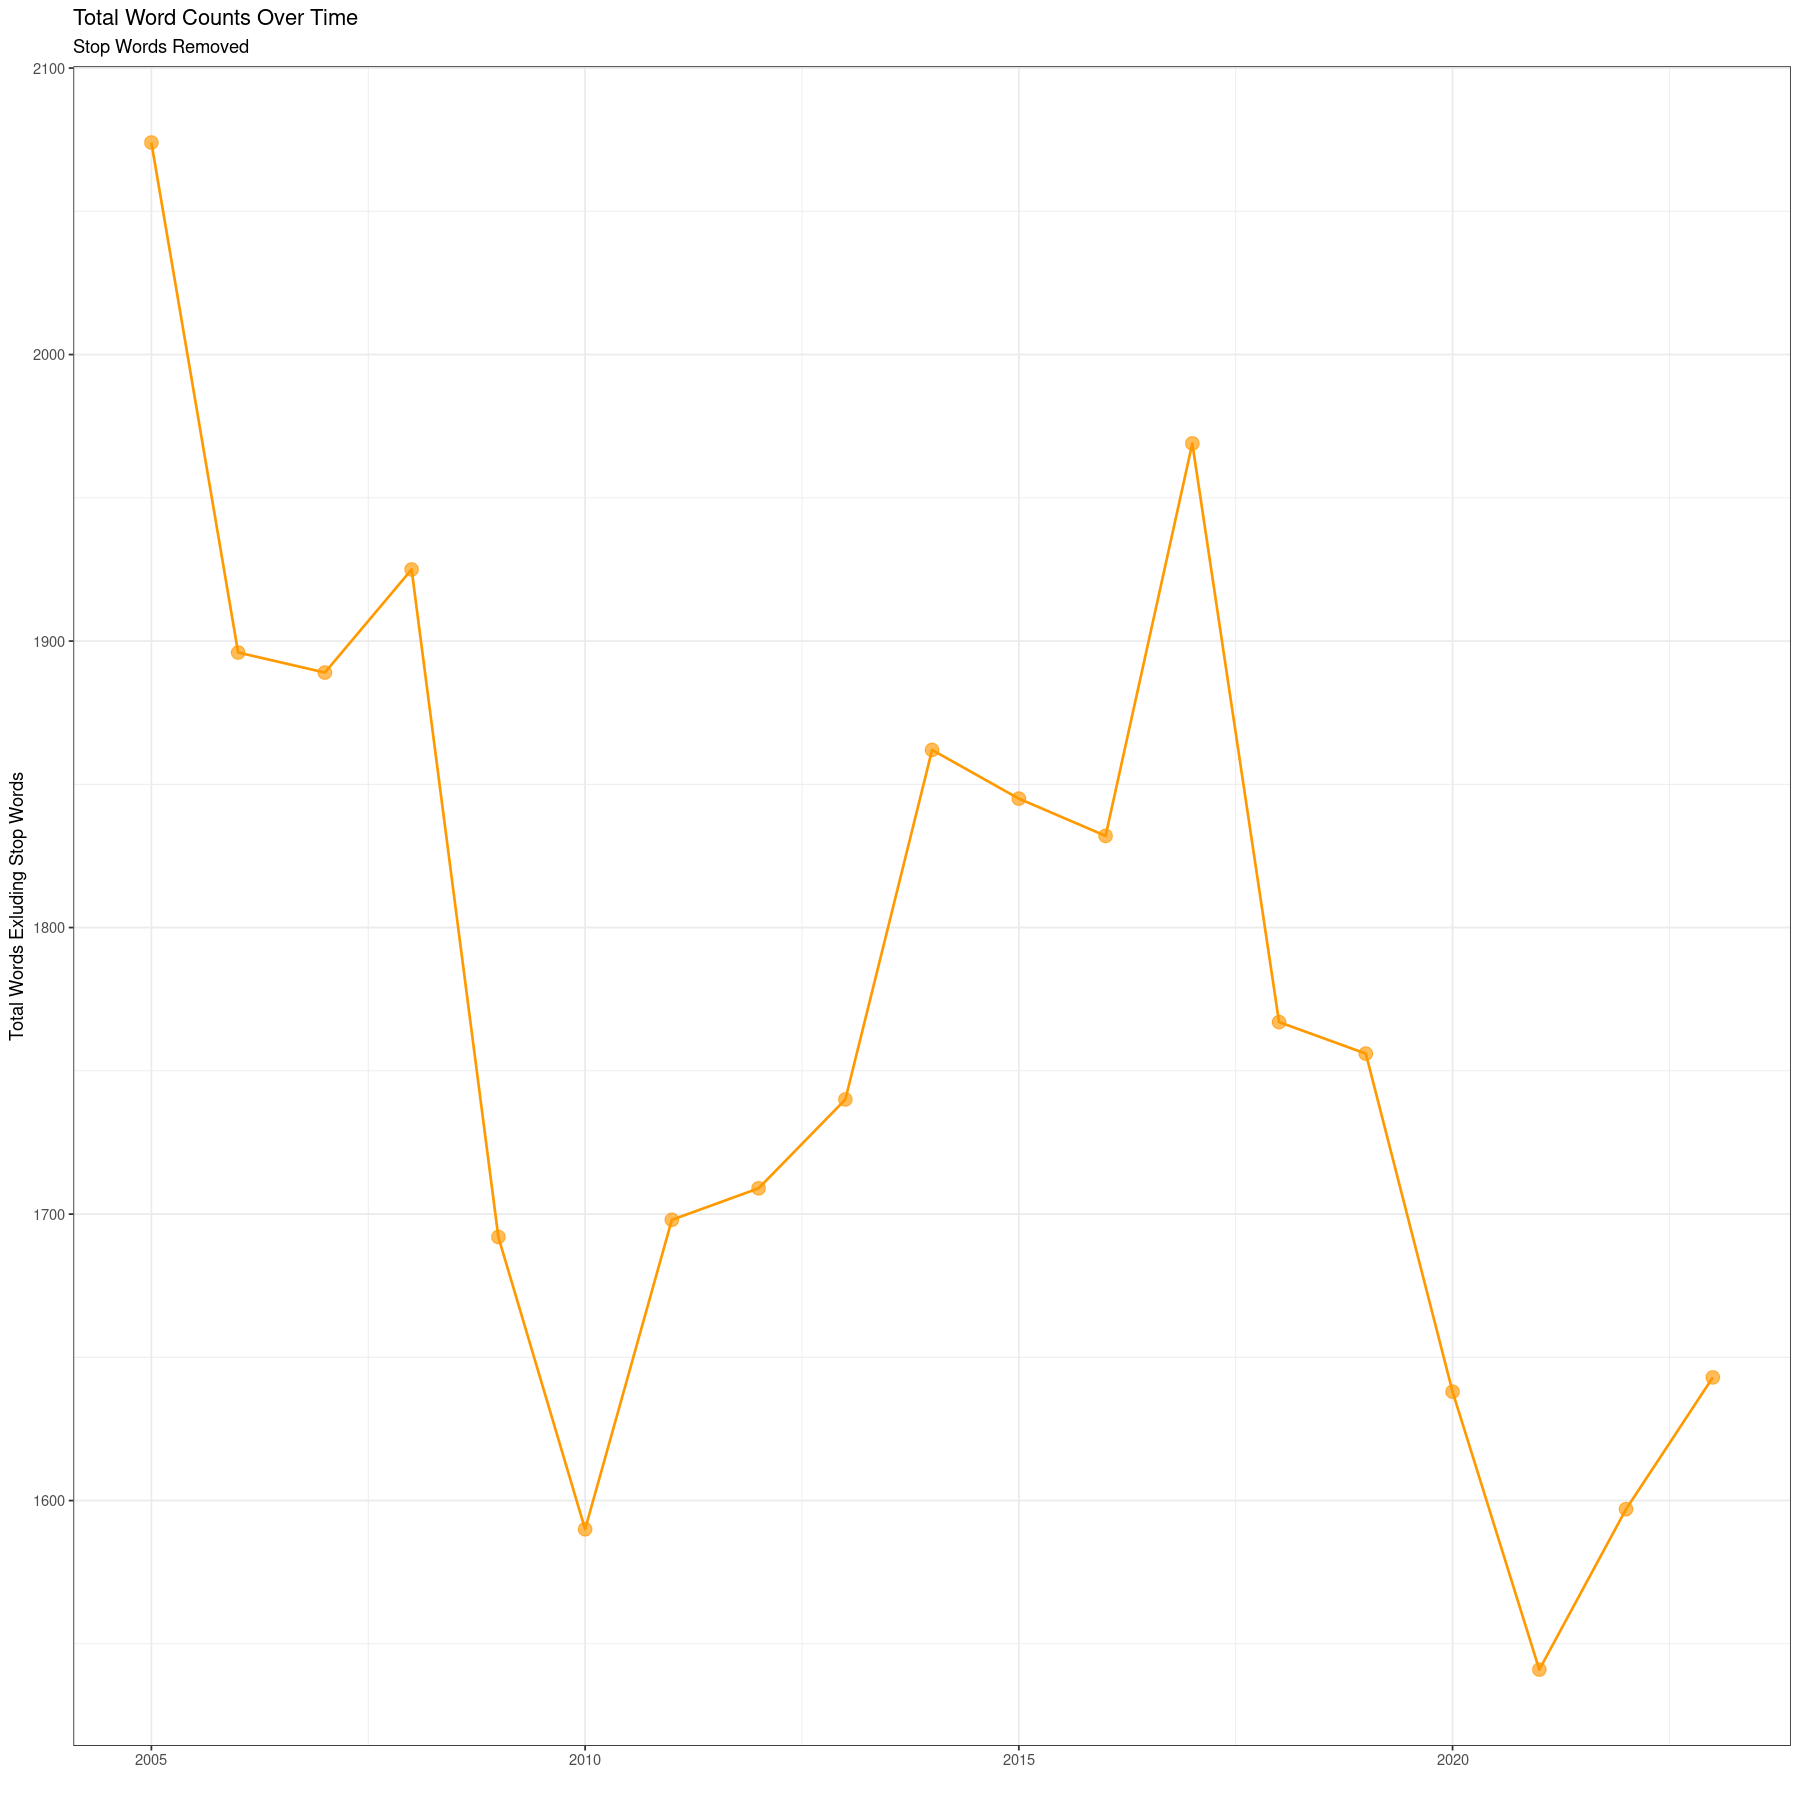

In [83]:
top_ten_terms = c("cash","tax","million","net","december","sales","income","financial","operating","stock")
my_pal <- c("#ff9900", "#146eb4", "#232f3e", "#f2f2f2", "#000000")
report_words_clean %>%
	filter(word %in% top_ten_terms) %>%
	group_by(year) %>%
	summarize("word_count" = n()) %>%
	ggplot(aes(x=year,y=word_count)) +
		  geom_point(color = my_pal[1], alpha = 0.65, size = 3.5) + 
  		  geom_line(color = my_pal[1], size = 0.75) +
  		  labs(title = "Total Word Counts Over Time", 
			   subtitle = "Stop Words Removed",
			   x = "",
			   y = "Total Words Exluding Stop Words") +
		theme_bw()

Not really. This would be an interesting rabbit hole to dig into but also a distraction for me at this time. 

# Step 3 - Deciding on a plot.
I wonder what the frequency of the top 10 words are for each year. Better yet, how about the top 30? I could make a bunch of lines plots but that would be a bit messy and deciding of 30 colors would be "poor data viz" decision. My background is genomics and sometimes I rethink a data problem into genomics. I have a state (i.e. `year`) and multiple variables (i.e. `word`) being measured across those years (i.e. the word frequency for that year). So maybe a heatmap would be a good visualization to try for this data? I also recently read a Medium article of temporal heatmaps, and had wanted to try it making one so this is the perfect opportunity!.

In [88]:
overall_top_30_terms <- report_words_clean %>%
	group_by(word) %>%
	summarize("word_count" = n()) %>%
	slice_max(order_by = word_count,n = 30) %>%
	select(word)

report_words_clean_collapse <- report_words_clean %>%
	filter(word %in% overall_top_30_terms$word) %>%
	count(word, year)

report_length <- report_words_clean %>%
  group_by(year) %>%
  summarize("report_length" = n()) 
#glimpse(report_words_clean_collapse)

report_words_clean_collapse_freq <- report_words_clean_collapse %>%
	inner_join(report_length, by = "year") %>%
	mutate(rel_freq = n/report_length) %>%
	select(-n)



head(report_words_clean_collapse_freq)

word,year,report_length,rel_freq
<chr>,<dbl>,<int>,<dbl>
amazon.com,2005,22977,0.004352178
amazon.com,2006,20560,0.004474708
amazon.com,2007,20554,0.004378710
amazon.com,2008,20338,0.004130200
amazon.com,2009,18454,0.004660236
amazon.com,2010,18205,0.002966218


Okay, lets do a test run of this heatmap.

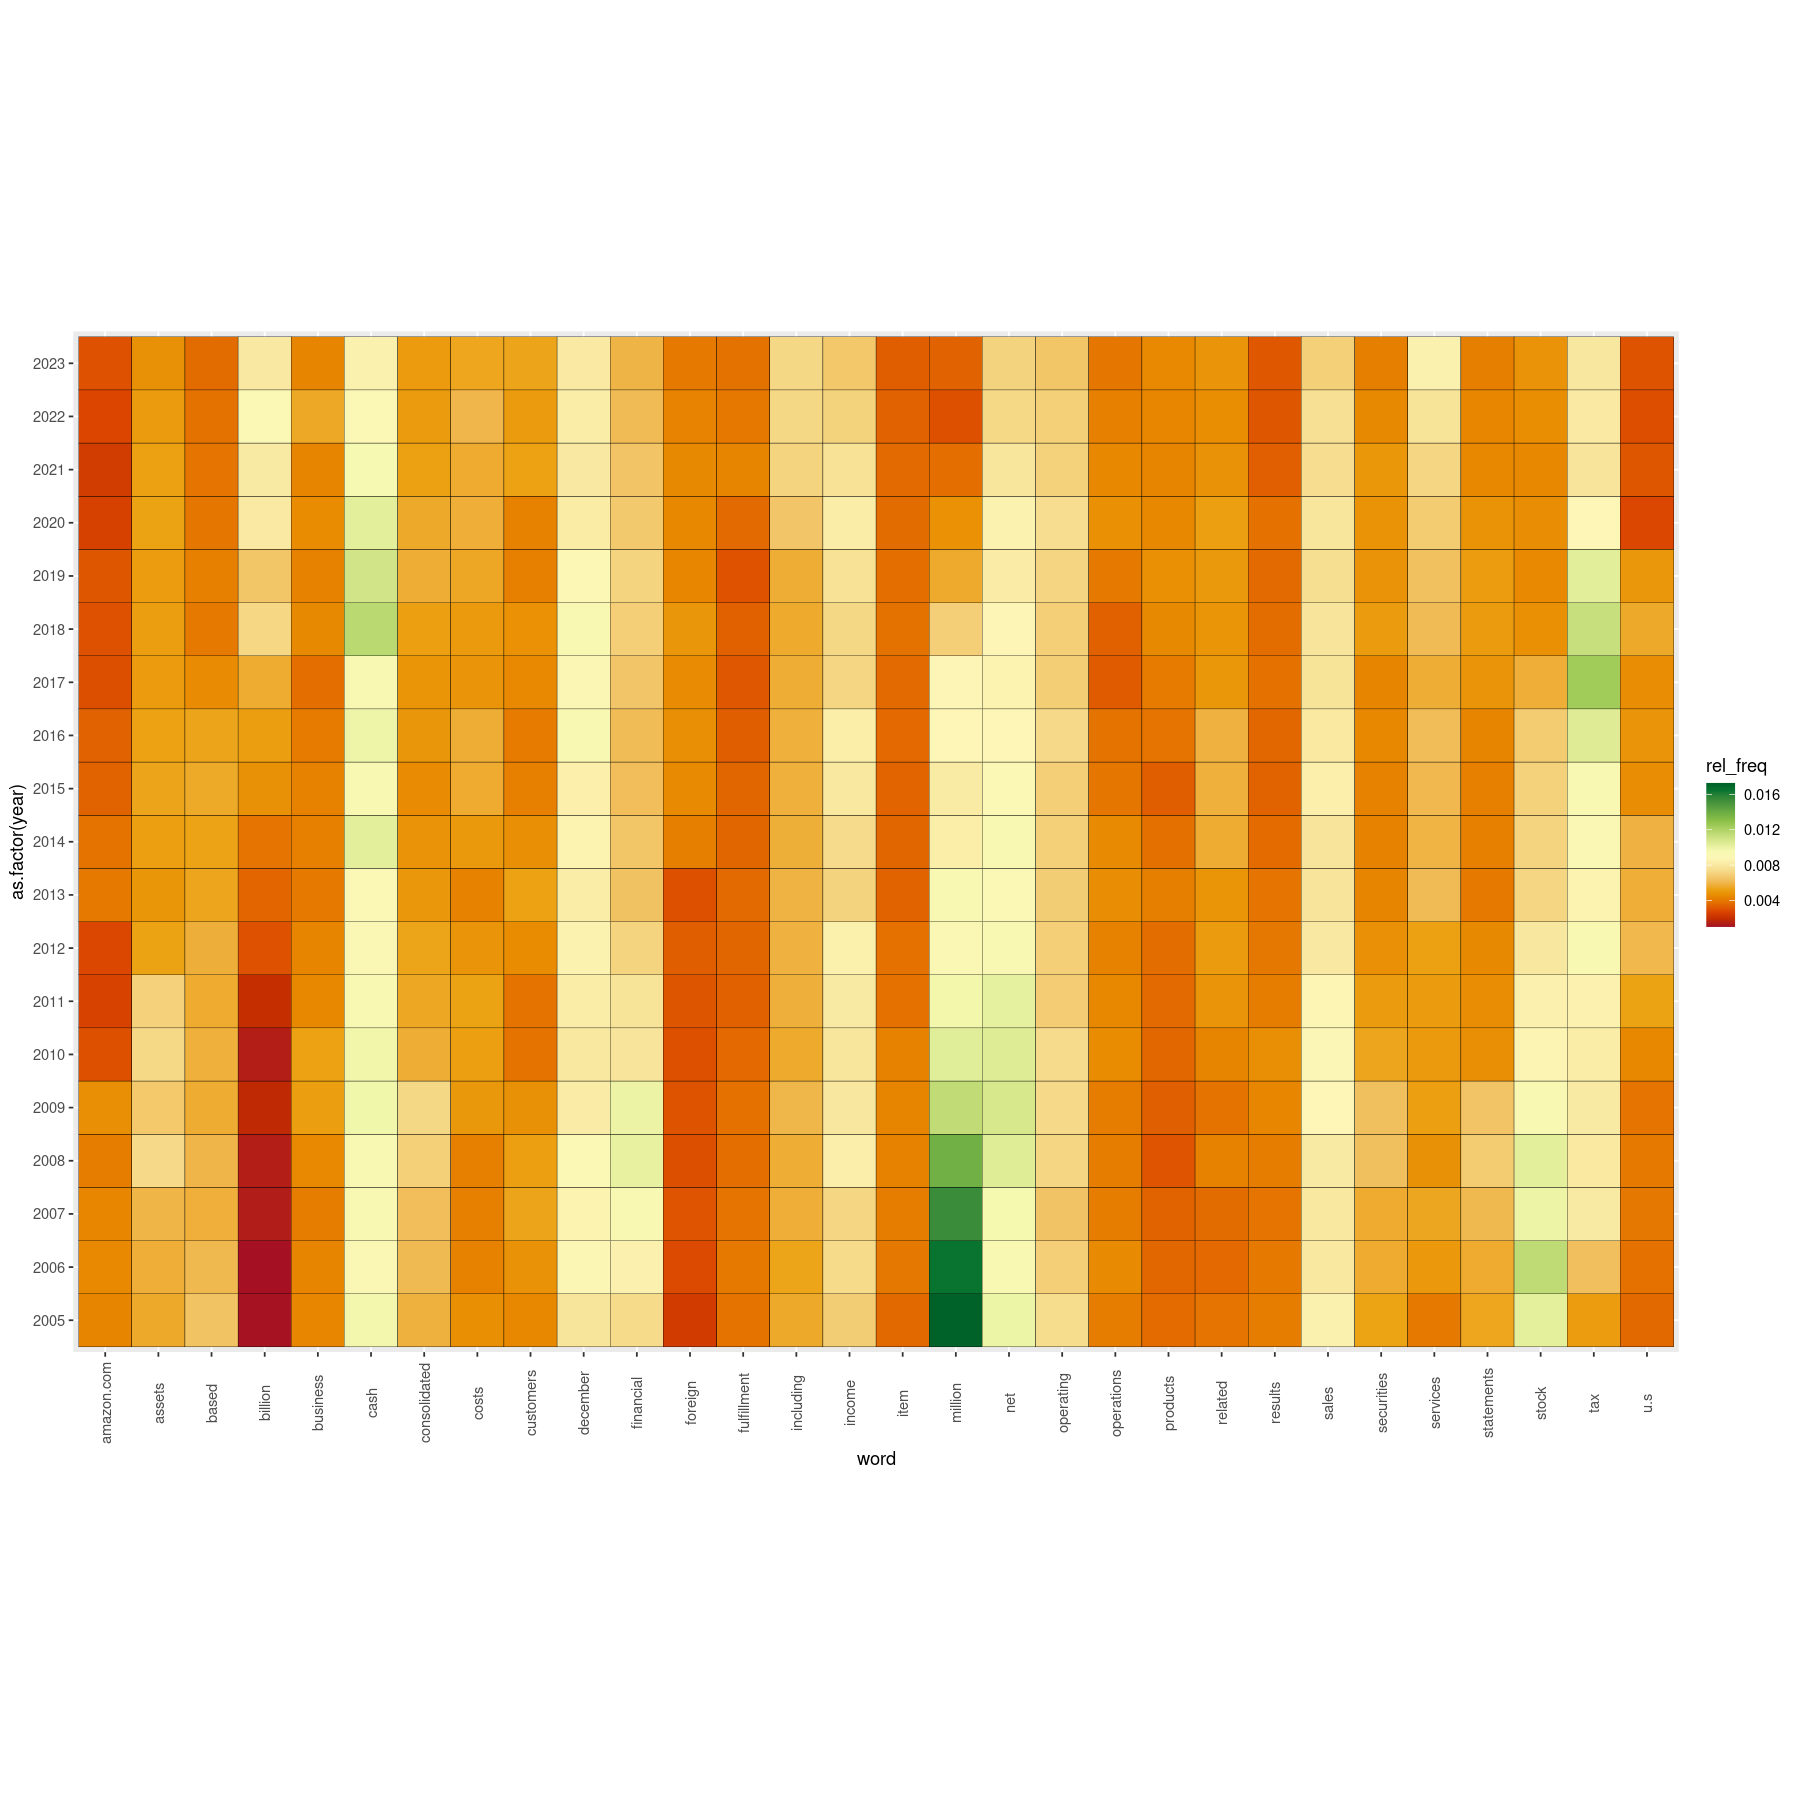

In [90]:
ggplot(report_words_clean_collapse_freq, aes(x = word, y = as.factor(year), fill = rel_freq)) +
  geom_tile(color = "black") +
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn")) +
  coord_fixed() +
  theme(axis.text.x = element_text(angle = 90,vjust = 0.5))

Not bad, but I think it would make sense for the x-axis to be the temporal component. It's more natural to view the passage of time akin to a timeline.

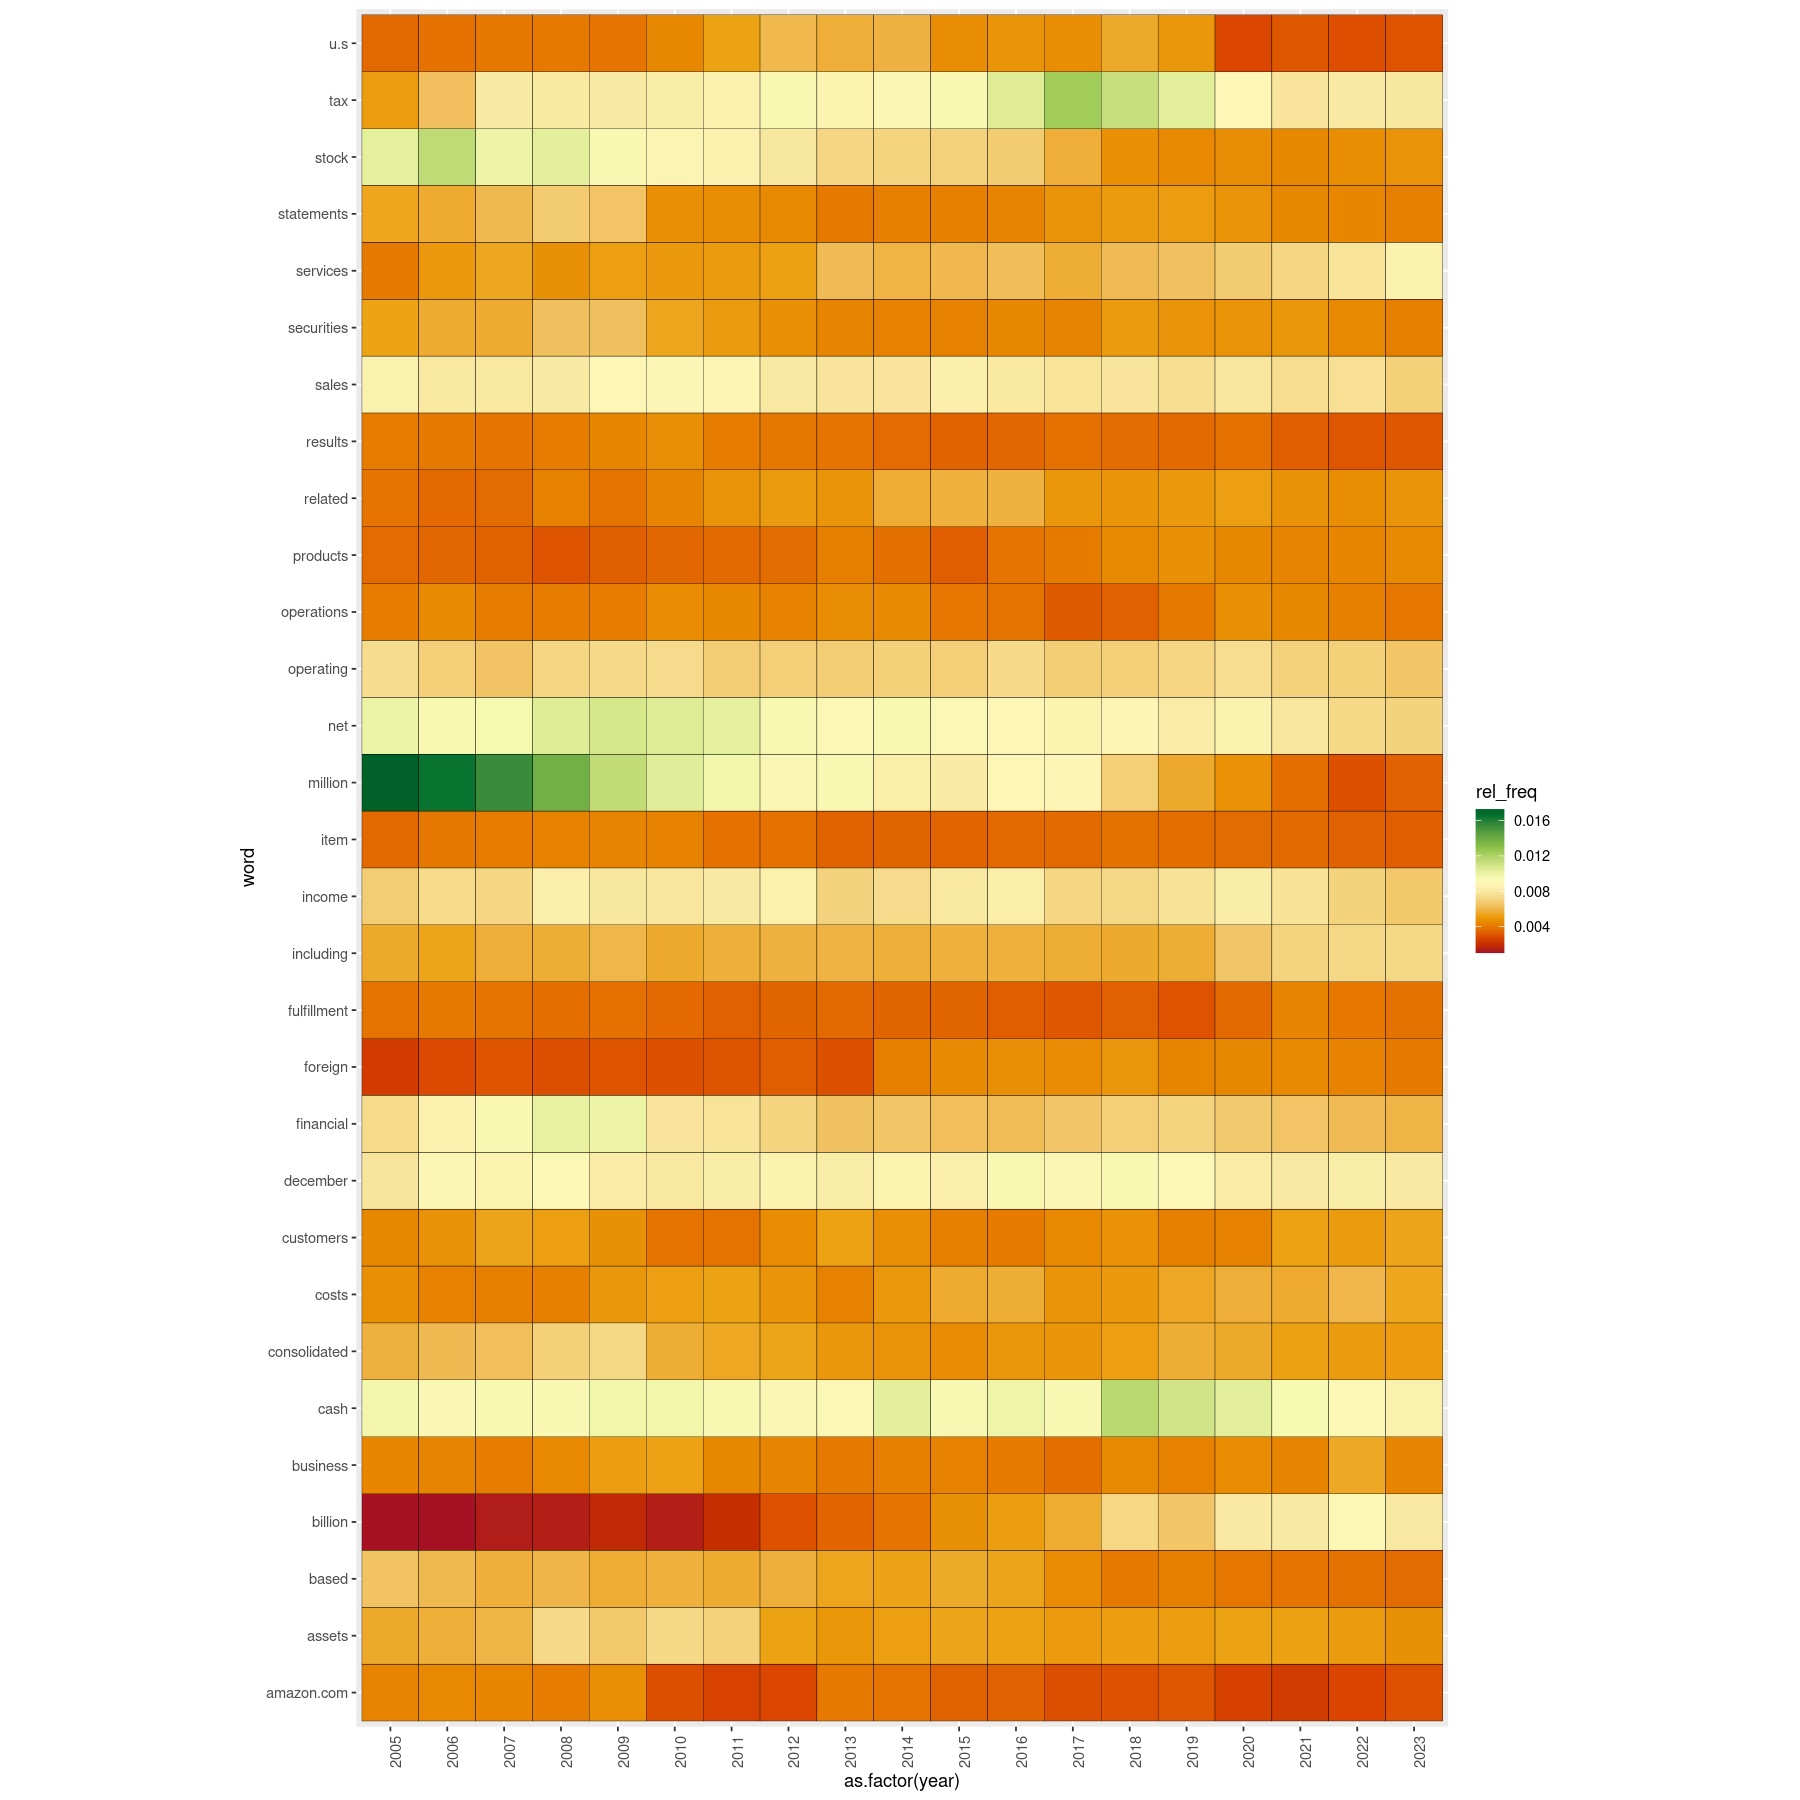

In [91]:

ggplot(report_words_clean_collapse_freq, aes(x = as.factor(year), y = word, fill = rel_freq)) +
  geom_tile(color = "black") +
  scale_fill_gradientn(colors = hcl.colors(20, "RdYlGn")) +
  coord_fixed() +
  theme(axis.text.x = element_text(angle = 90))

Better! We can see how the usage of the top 30 terms in Amazon's annual reports shift over the years. Most are seem to be stable while other terms like "millions" and "billions" are trending downwards and upwards, respectively. Interestingly, "amazon.com" seems to be decreasing in frequency. 

# Step 4 - Finetuning
So we have a figure! Now lets finetune it with labels as well as deciding on color usage. One thing to consider when making your figures accessible is taking into account people who are color-blind. Sadly, this iteration used a red-green palette. So, I swapped in the `viridis` palette instead. Added some labels, removed unnecessary ones, adjusted the labels to line up with the tick marks more, and added a subtitle and caption, and voila! 
Temporal heatmap of the frequency of the top 30 terms seen in Amazon's Annual reports from 2005 to 2023.

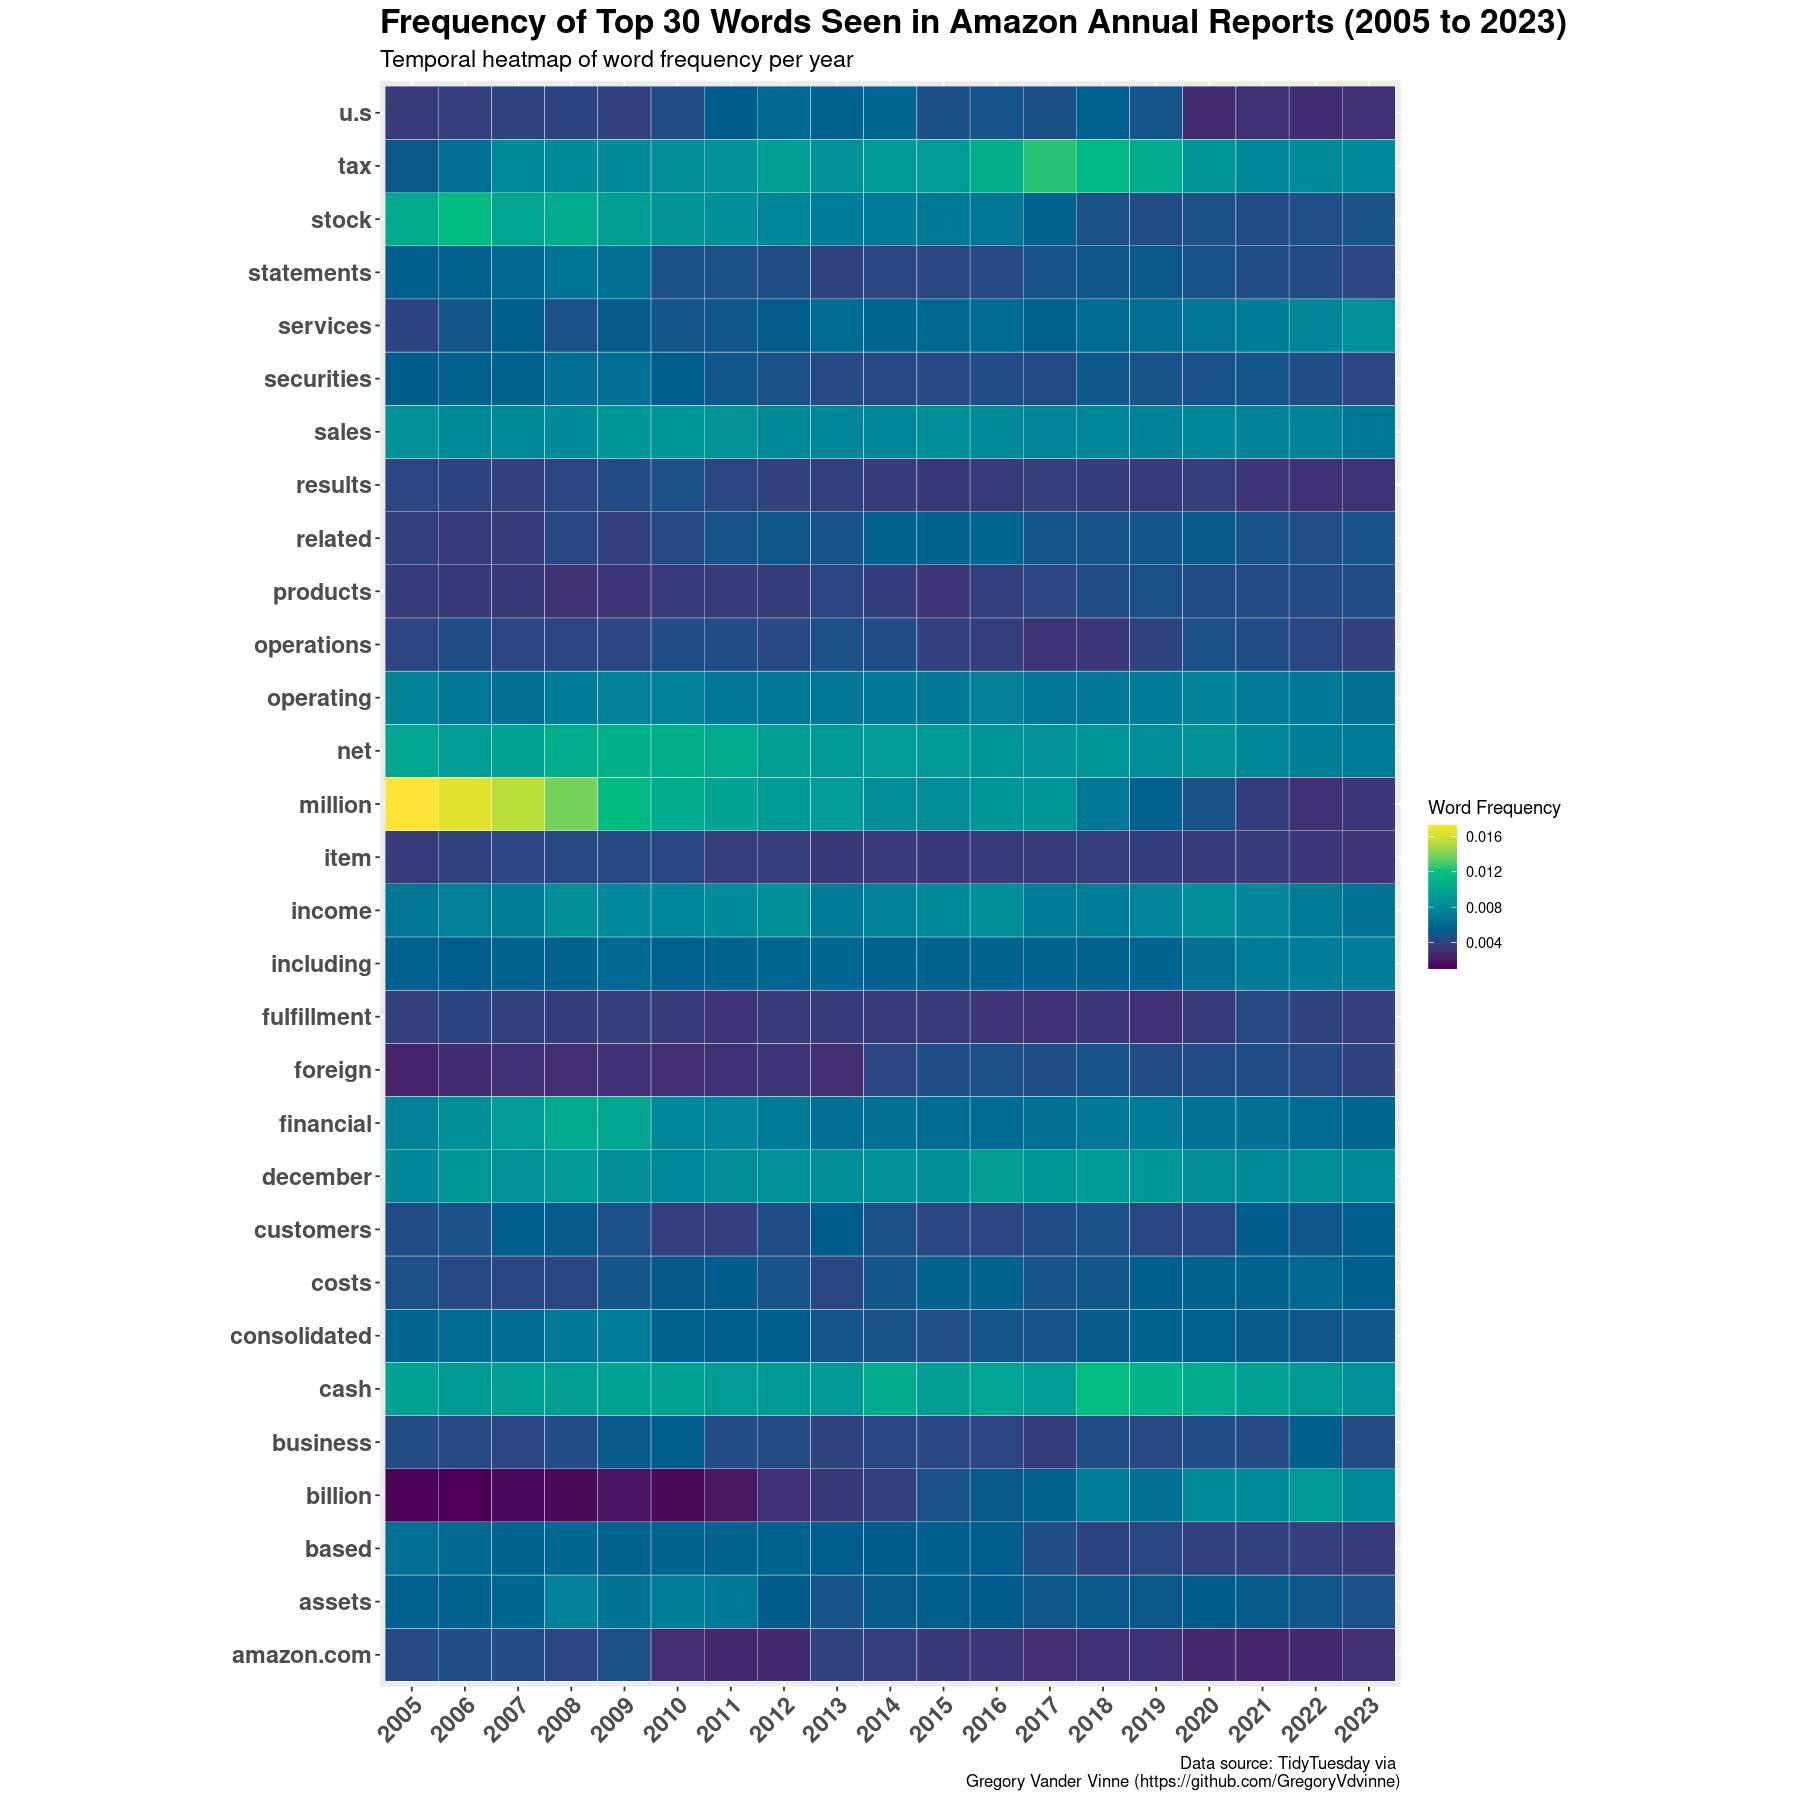

In [93]:
options(repr.plot.width=15, repr.plot.height=15)

ggplot(report_words_clean_collapse_freq, aes(x = as.factor(year), y = word, fill = rel_freq)) +
  geom_tile(color = "white") +
  scale_fill_gradientn(colors = hcl.colors(20, "Viridis")) +
  coord_fixed() +
  guides(fill = guide_colourbar(barwidth = 0.5,
                                barheight = 20)) +
  theme(axis.text.x = element_text(angle = 45, vjust = 1,hjust = 1,face="bold", size = 14),
		axis.text.y = element_text(face="bold", size = 14),
		axis.title.x = element_blank(),
	   	axis.title.y = element_blank(),
	   	plot.title = element_text(face = "bold",size = 20),
	    plot.subtitle = element_text(size = 14),
	    plot.caption = element_text(size = 10)) +
  labs(title = "Frequency of Top 30 Words Seen in Amazon Annual Reports (2005 to 2023)",
	   subtitle = "Temporal heatmap of word frequency per year",
	   caption = "Data source: TidyTuesday via \n Gregory Vander Vinne (https://github.com/GregoryVdvinne)") +
  guides(fill = guide_colourbar(title = "Word Frequency"))
